# Image Filtering Using Convolution in OpenCV

This notebook is based on the analysis of the website: https://learnopencv.com/image-filtering-using-convolution-in-opencv/#intro-convo-kernels

It covers key concepts of convolution kernels for image filtering, with explanations and Python code examples using OpenCV.

Note: You need to have OpenCV and Matplotlib installed (pip install opencv-python matplotlib). Replace 'test.jpg' with your own image file path. This notebook uses matplotlib for displaying multiple images side by side in subplots for better comparison.

## Table of Contents
    1. An Introduction to Convolution Kernels in Image Processing
    2. How to Use Kernels to Sharpen or Blur Images?
    3. Applying Identity Kernel to an Image in OpenCV
    4. Blurring an Image using a Custom 2D Convolution Kernel
    5. Blurring an image using OpenCV’s Built-In Blurring Function
    6. Applying Gaussian Blurring to an Image in OpenCV
    7. Applying Median Blurring to an Image in OpenCV
    8. Sharpening an Image using Custom 2D Convolution Kernel
    9. Applying Bilateral Filtering to an Image in OpenCV
    10. Interesting Applications

In [1]:
# All the imports
import cv2
import os
import numpy as np
from tools.tools import LearnTools
learn_tools = LearnTools()



# test_image_link = "https://i.ibb.co.com/BVSYcmyY/joey-kyber-GPxgi4-J82-E4-unsplash.jpg"
# pil_image = await learn_tools.get_image(img_url=test_image_link, padding=0)
# pil_image.save("testImage.jpg", "JPEG")

## Introduction to Convolution Kernels

In image processing, a convolution kernel is a 2D matrix used to filter images. It is typically a square matrix with odd dimensions (e.g., 3×3, 5×5). Convolution kernels perform operations on each pixel to achieve effects like blurring or sharpening.

Blurring reduces noise or removes backgrounds. It's a fundamental technique in computer vision.

## How to Use Kernels to Sharpen or Blur Images

Filtering is done by convolving the kernel with the image:
1. Position the kernel's center over a pixel.
2. Multiply each kernel element by the corresponding pixel intensity.
3. Sum the products and compute the average.
4. Replace the pixel with this average.

The kernel values determine the effect (e.g., all-ones for blurring).

In [2]:
# Load the image once
if os.path.exists('testImage.jpg'):
    image = cv2.imread('testImage.jpg')
    print("image exists")
elif not os.path.exists('testImage.jpg'):
    image_url = "https://i.ibb.co.com/BVSYcmyY/joey-kyber-GPxgi4-J82-E4-unsplash.jpg"
    pil_image = await learn_tools.get_image(img_url=image_url, padding=0)
    pil_image.save("testImage.jpg", "JPEG")
    image = learn_tools.pil_to_cv2(pil_image)
    print("image created")

if image is None:
    print('Could not read image')

image created


## Applying Identity Kernel

The identity kernel leaves the image unchanged:


[[0, 0, 0],
 [0, 1, 0],
 [0, 0, 0]]


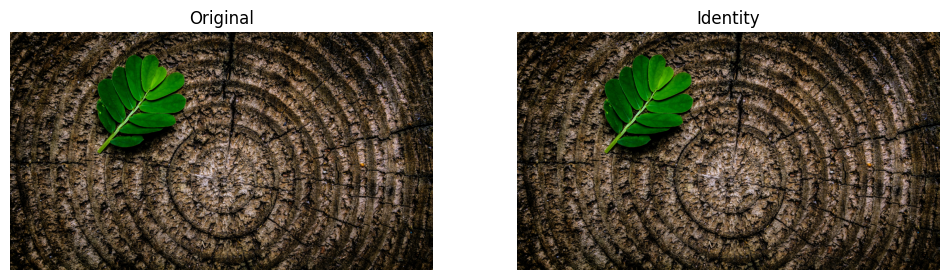

In [3]:
if image is not None:
    kernel1 = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [0, 0, 0]])

    identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

    learn_tools.show_two_images('Original', image, 'Identity', identity)
    # cv2.imwrite('identity.jpg', identity)

## Blurring an Image Using Custom 2D Convolution Kernel

Use a normalized 5×5 kernel of all ones for blurring.

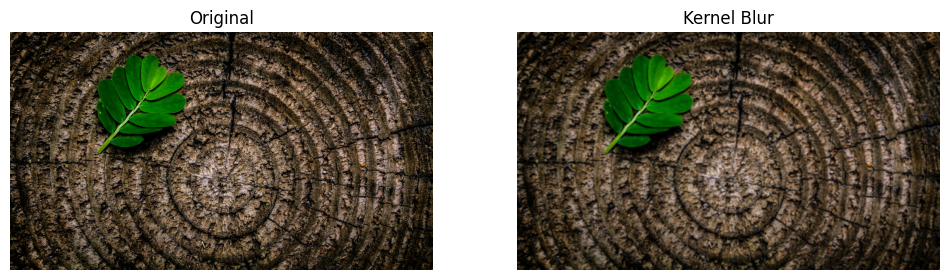

In [4]:
if image is not None:
    kernel2 = np.ones((5, 5), np.float32) / 25
    img_blur_custom = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

    learn_tools.show_two_images('Original', image, 'Kernel Blur', img_blur_custom)
    # cv2.imwrite('blur_kernel.jpg', img_blur_custom)

## Blurring Using OpenCV’s Built-In Function

Use cv2.blur() for uniform blur.

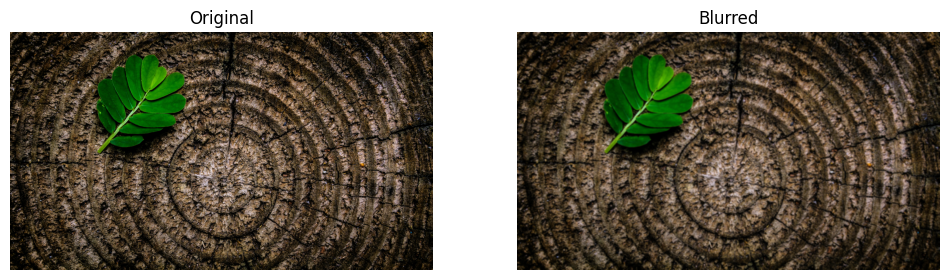

In [5]:
if image is not None:
    img_blur = cv2.blur(src=image, ksize=(5,5))

    learn_tools.show_two_images('Original', image, 'Blurred', img_blur)
    # cv2.imwrite('blur.jpg', img_blur)

## Applying Gaussian Blurring

Gaussian blur uses weighted averages, preserving edges better.

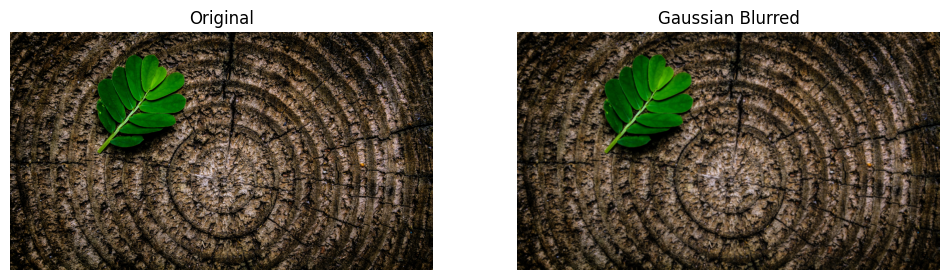

In [6]:
if image is not None:
    gaussian_blur = cv2.GaussianBlur(src=image, ksize=(5,5), sigmaX=0, sigmaY=0)

    learn_tools.show_two_images('Original', image, 'Gaussian Blurred', gaussian_blur)
    # cv2.imwrite('gaussian_blur.jpg', gaussian_blur)

## Applying Median Blurring

Median blur replaces pixels with median values, effective for noise.

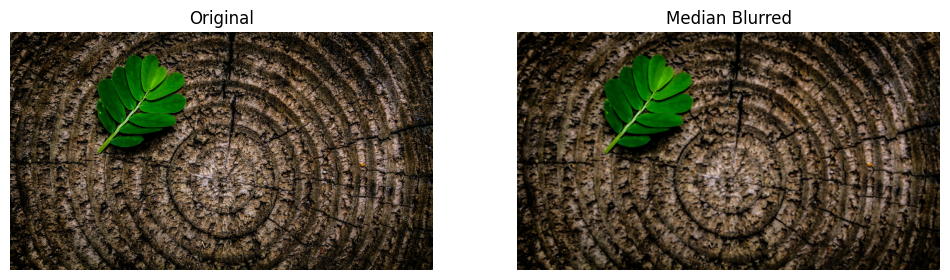

In [7]:
if image is not None:
    median = cv2.medianBlur(src=image, ksize=5)

    learn_tools.show_two_images('Original', image, 'Median Blurred', median)
    # cv2.imwrite('median_blur.jpg', median)

## Sharpening an Image Using Custom Kernel

Sharpening kernel:


[[0, -1, 0],
 [-1, 5, -1],
 [0, -1, 0]]


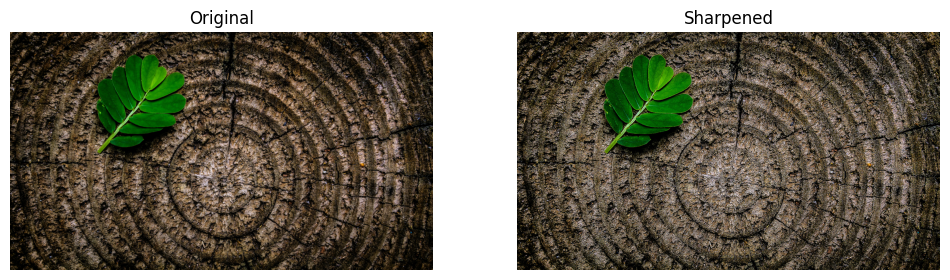

In [8]:
if image is not None:
    kernel3 = np.array([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]])
    sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel3)

    learn_tools.show_two_images('Original', image, 'Sharpened', sharp_img)
    # cv2.imwrite('sharp_image.jpg', sharp_img)

## Applying Bilateral Filtering

Bilateral filtering blurs similar regions while preserving edges.

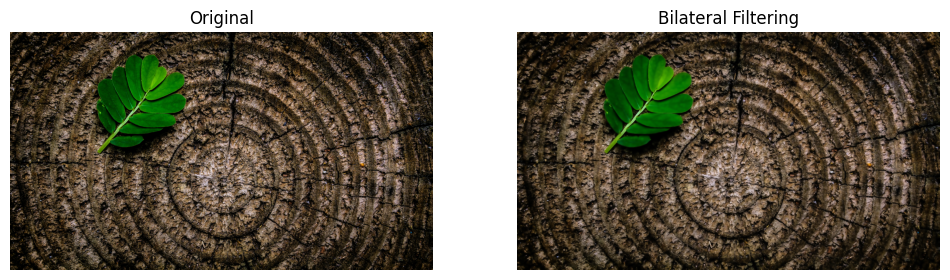

In [9]:
if image is not None:
    bilateral_filter = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

    learn_tools.show_two_images('Original', image, 'Bilateral Filtering', bilateral_filter)
    # cv2.imwrite('bilateral_filtering.jpg', bilateral_filter)

## Summary

Convolution kernels enable custom image filtering in OpenCV. Built-in functions provide efficient alternatives for common tasks. Bilateral filtering is great for noise reduction with edge preservation.

Analysis: The examples demonstrate how different kernels and functions affect image quality. Custom kernels offer flexibility, while built-in methods are optimized for performance. Experiment with parameters for best results.

## How to Make This a Jupyter Notebook

To turn this JSON structure into a runnable Jupyter Notebook (.ipynb file):

1. Copy the entire JSON content above.
2. Paste it into a text editor (e.g., Notepad, VS Code).
3. Save the file with a .ipynb extension, such as 'image_filtering.ipynb'.
4. Open the file in Jupyter Notebook (install via pip install notebook if needed, then run jupyter notebook in your terminal).
5. Alternatively, upload it to Google Colab or JupyterLab online.
6. Ensure you have the required libraries installed and replace 'test.jpg' with your image path.
7. Run the cells sequentially to see the outputs.

This updated notebook uses Matplotlib subplots to plot multiple images side by side for each filtering example, allowing direct visual comparison without separate figures.